# *Fandango Fake Rating Analysis Project*


<a><img src='https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FFandango_Media&psig=AOvVaw2WPXHUVAgg57HcN1jnvanm&ust=1715884093049000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCLCC0cCkkIYDFQAAAAAdAAAAABAE/'></a>

<b>*OVERVIEW* :</b> This project looks into the trustworthiness of online movie ratings, especially those by Fandango in 2015. This project is inspired by an article from FiveThirtyEight, aiming to see if Fandango’s ratings lean towards higher scores, maybe due to its ticket-selling business. Using data analysis and visualization, this project will check if Fandango's ratings truly mirror movie quality, revealing insights into the reliability of online movie ratings.

<b>*LIBRARIES USED* :</b> Pandas, Matplotlib, Seaborn, NumPy

----

This project is in reference to this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

### *The Data*

You can find the data supporting the article [Be Suspicious Of Online Movie Ratings, Especially Fandango’s]
(http://fivethirtyeight.com/features/fandango-movies-ratings/) openly accessible on 538's GitHub page at: https://github.com/fivethirtyeight/data. The dataset includes two CSV files: one containing Fandango's star ratings and displayed ratings, and the other offering aggregate data on movie ratings from various other platforms such as Metacritic, IMDb, and Rotten Tomatoes.

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

### Importing libraries

In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exploring the scraped data

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [8]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='VOTES', ylabel='RATING'>

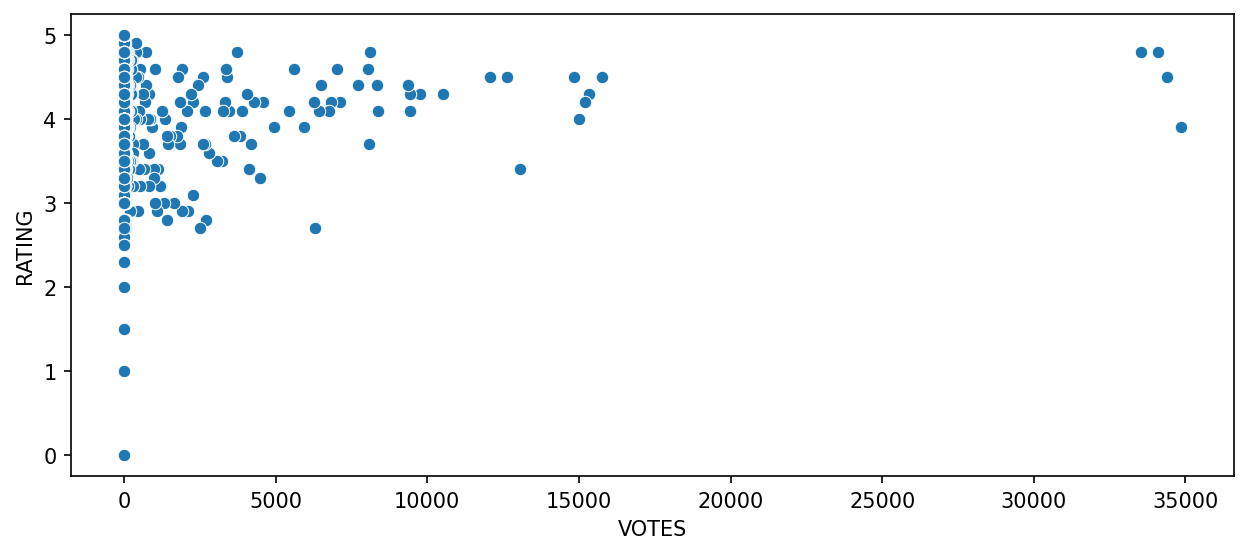

In [5]:
plt.figure(figsize = (10,4), dpi = 150)
sns.scatterplot(data = fandango, x = 'VOTES', y = 'RATING')

In [6]:
fandango.corr() # correlation function

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


#### This difference in the value of the 'STARS' and 'RATING' shows that there is a difference between stars shown to the user compared to the actual rating. 

In [7]:
fandango['FILM'][1].split('(')[-1].replace(')', '')

'2015'

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title : title.split('(')[-1].replace(')', ''))
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [12]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

#### Number of movies in the Fandango database per year (till 2015). 

<AxesSubplot:xlabel='YEAR', ylabel='count'>

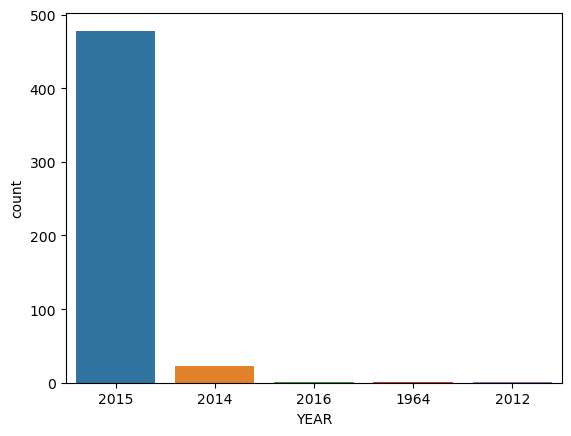

In [11]:
sns.countplot(data = fandango, x = 'YEAR') # function similar to value_counts()

#### Mostly movies from 2015 and few from 2014. 

In [12]:
fandango.nlargest(10, 'VOTES') # nlargest() sorts the colomn in ascending order

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [14]:
fandango.nlargest(10, 'RATING')

,FILM,STARS,RATING,VOTES,YEAR
296,National Theatre Live: Man and Superman (2015),5.0,5.0,10,2015
304,Maze Runner: The Scorch Trials (2015),5.0,5.0,9,2015
317,Cheatin' (2015),5.0,5.0,8,2015
323,League of Legends LCS Summer Finals (2015),5.0,5.0,7,2015
329,Hotel Transylvania 2 (2015),5.0,5.0,6,2015
330,Soaked In Bleach (2015),5.0,5.0,6,2015
365,National Theatre Live: The Hard Problem (2015),5.0,5.0,4,2015
366,The Boy (2015),5.0,5.0,4,2015
367,The Perfect Guy (2015),5.0,5.0,4,2015
380,Fall to Rise (2015),5.0,5.0,3,2015


In [13]:
fandango.nlargest(10, 'STARS')

,FILM,STARS,RATING,VOTES,YEAR
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
10,Cinderella (2015),5.0,4.5,12640,2015
11,Ant-Man (2015),5.0,4.5,12055,2015
19,Straight Outta Compton (2015),5.0,4.8,8096,2015
21,The Imitation Game (2014),5.0,4.6,8055,2014
24,Selma (2014),5.0,4.6,7025,2014
32,Southpaw (2015),5.0,4.6,5597,2015
43,Dragon Ball Z: Resurrection 'F' (2015),5.0,4.8,3740,2015


In [68]:
fandango[fandango['VOTES'] == 0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [15]:
print(len(fandango[fandango['VOTES'] == 0]))

69


#### Need to remove these useless data (aka data cleaning) for much more accurate results.  

In [16]:
reviewed_movies = fandango[fandango['VOTES']>0] 

In [17]:
reviewed_movies

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


#### A cleaner DataFrame now.

### STARS vs. RATING (how much is the rating value normalised?) 

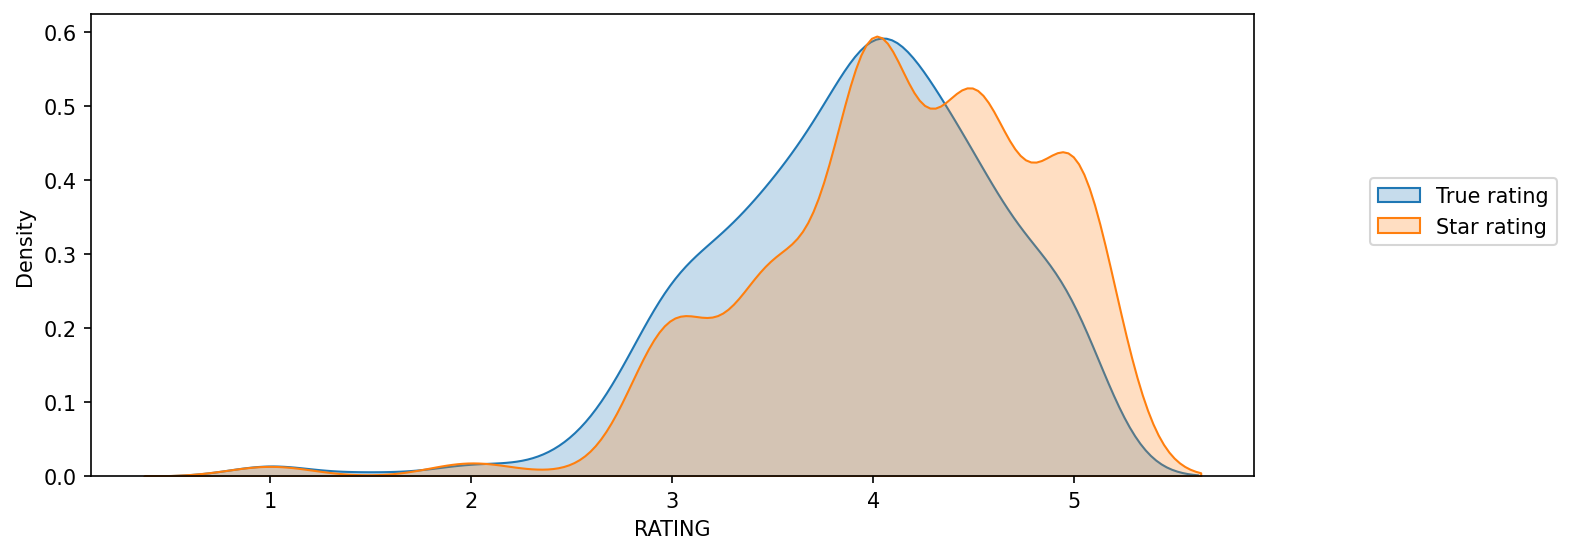

In [18]:
# use KDE (Kernel density estimation) here

plt.figure(figsize = (10, 4), dpi = 150)

sns.kdeplot(data = reviewed_movies, x = 'RATING', label = 'True rating', fill = True) 
sns.kdeplot(data = reviewed_movies, x = 'STARS', label = 'Star rating', fill = True) 

plt.legend(loc = (1.1, 0.5))

(0.0, 10.0)

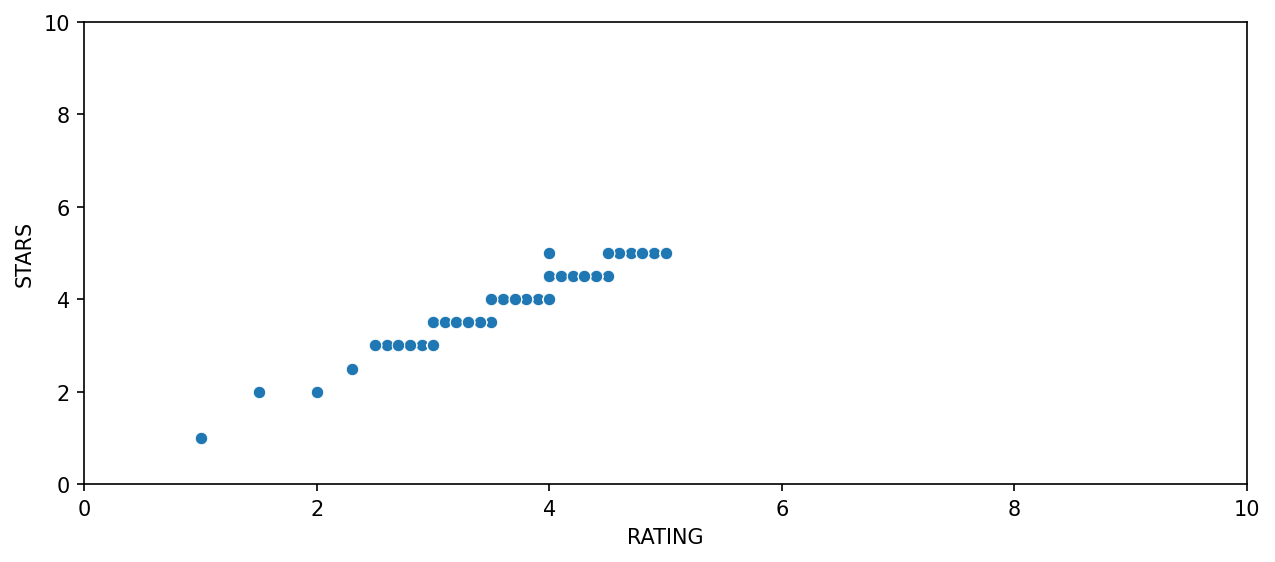

In [19]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.scatterplot(data = reviewed_movies, x = 'RATING', y = 'STARS')
plt.xlim(0,10)
plt.ylim(0,10)

#### Clearly from the first graph there's a huge difference between the number of movies that are actually rated lower and stars displayed. High density (or number of movies) that are start rated 4.5 and 5 wheras the true rating for the same is drastically different. This is also evident from the second graph. Lets quantify this further.  

In [20]:
reviewed_movies['TRUE_STAR_DIFF'] = reviewed_movies['STARS'] - reviewed_movies['RATING'] # ERROR BECAUSE reviewed_movies IS A COPY OF THE ORIGINAL DataFrame fandango. IGNORE!!!

C:\Users\krizc\AppData\Local\Temp\ipykernel_20432\386063358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_movies['TRUE_STAR_DIFF'] = reviewed_movies['STARS'] - reviewed_movies['RATING'] # ERROR BECAUSE reviewed_movies IS A COPY OF THE ORIGINAL DataFrame fandango. IGNORE!!!


In [21]:
reviewed_movies

,FILM,STARS,RATING,VOTES,YEAR,TRUE_STAR_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [91]:
reviewed_movies.nlargest(10, 'TRUE_STAR_DIFF')

,FILM,STARS,RATING,VOTES,YEAR,TRUE_STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,0.5
10,Cinderella (2015),5.0,4.5,12640,2015,0.5
11,Ant-Man (2015),5.0,4.5,12055,2015,0.5
50,Top Five (2014),4.0,3.5,3223,2014,0.5
70,Do You Believe? (2015),5.0,4.5,1793,2015,0.5
85,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,2015,0.5
89,Shaun the Sheep Movie (2015),4.5,4.0,896,2015,0.5
90,Love & Mercy (2015),4.5,4.0,864,2015,0.5
94,Far From The Madding Crowd (2015),4.5,4.0,804,2015,0.5


In [21]:
reviewed_movies['TRUE_STAR_DIFF'].value_counts()

0.0    107
0.2     82
0.3     72
0.4     44
0.1     40
0.5     37
0.1     26
0.4     26
1.0      1
Name: TRUE_STAR_DIFF, dtype: int64

#### So 107 movies were had thier star rating displayed = true rating. 37 movies had a bias of 0.5 rating (that is 4.0 shown as 4.5) and only 1 had a bias of 1. It's either the same or high but most of the times the star rating is high compared to the true rating, justified as rounding off. But how do you round off 4.0 to a 5.0 like Turbo Kid? lol.

<AxesSubplot:xlabel='TRUE_STAR_DIFF', ylabel='count'>

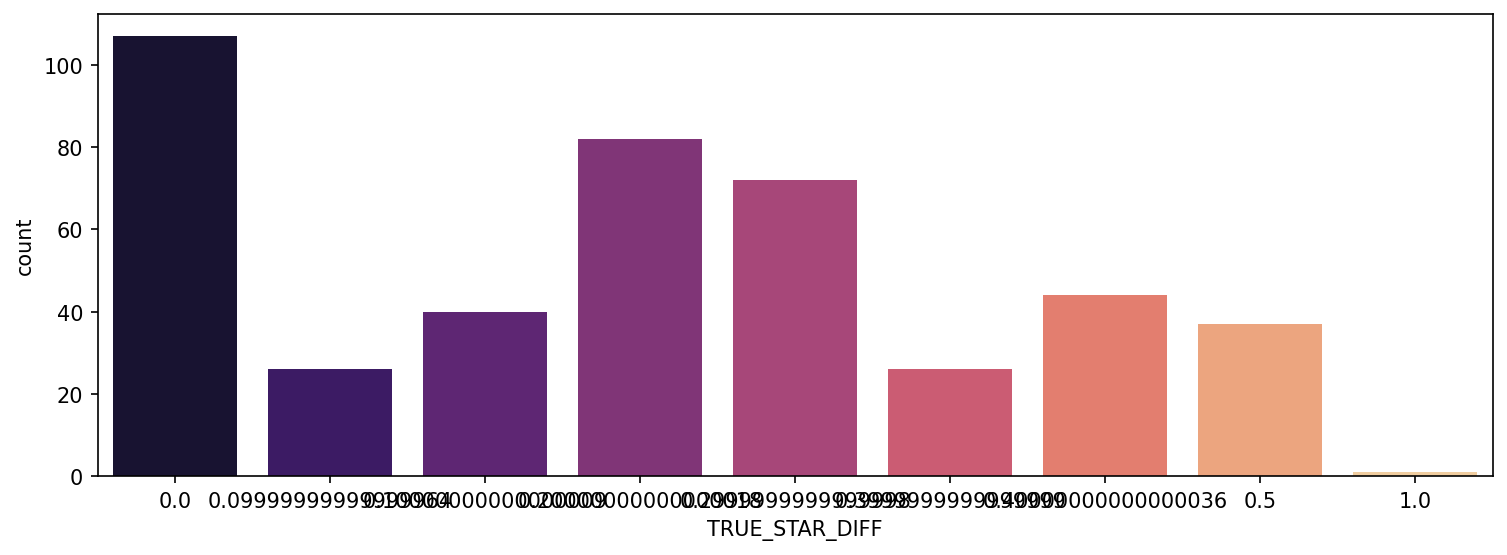

In [22]:
plt.figure(figsize = (12, 4), dpi = 150)

sns.countplot(data = reviewed_movies, x = 'TRUE_STAR_DIFF', palette = 'magma')

#### Basically the same thing as above but in form of a graph.

In [23]:
reviewed_movies[reviewed_movies['TRUE_STAR_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,TRUE_STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Comparing Fandango to other sites  

#### Now that we know Fandango has a huge bias it's a good idea to compare thier ratings to other sites like RottenTomatoes, Metacritic, and IMDb.  

In [24]:
other_sites = pd.read_csv('all_sites_scores.csv')

In [25]:
other_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


## Rotten Tomatoes 

Rotten Tomatoes has two different ratings, 1) user ratings and 2) critic ratings. Let's analyse both of these ratings and the degree of difference. 

(0.0, 100.0)

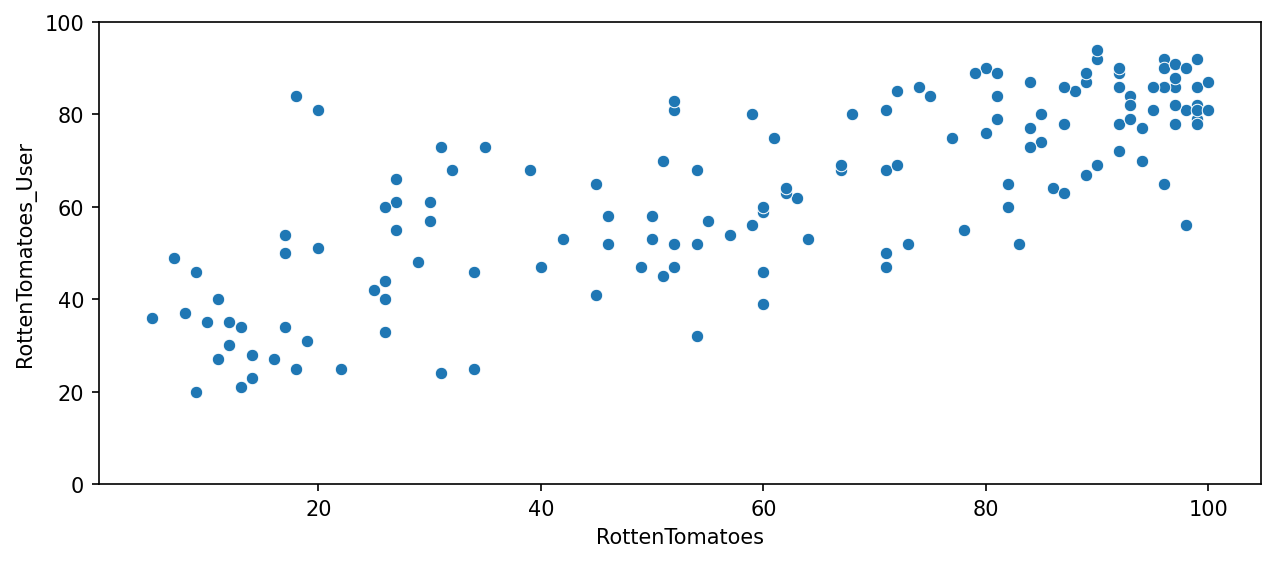

In [26]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.scatterplot(data = other_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')
plt.ylim(0,100)

The relationship is pretty much linear. Which means on average both normal users and critics rates a movie in a similar way. Let's quantify this further. 

In [27]:
other_sites['Rotten_Rating_Diff'] = other_sites['RottenTomatoes'] - other_sites['RottenTomatoes_User']

In [28]:
#other_sites['Rotten_Rating_Diff']
other_sites['Rotten_Rating_Diff'].apply(abs).mean()

15.095890410958905

This is the average difference in rating between users and critics.

<AxesSubplot:xlabel='Rotten_Rating_Diff', ylabel='Count'>

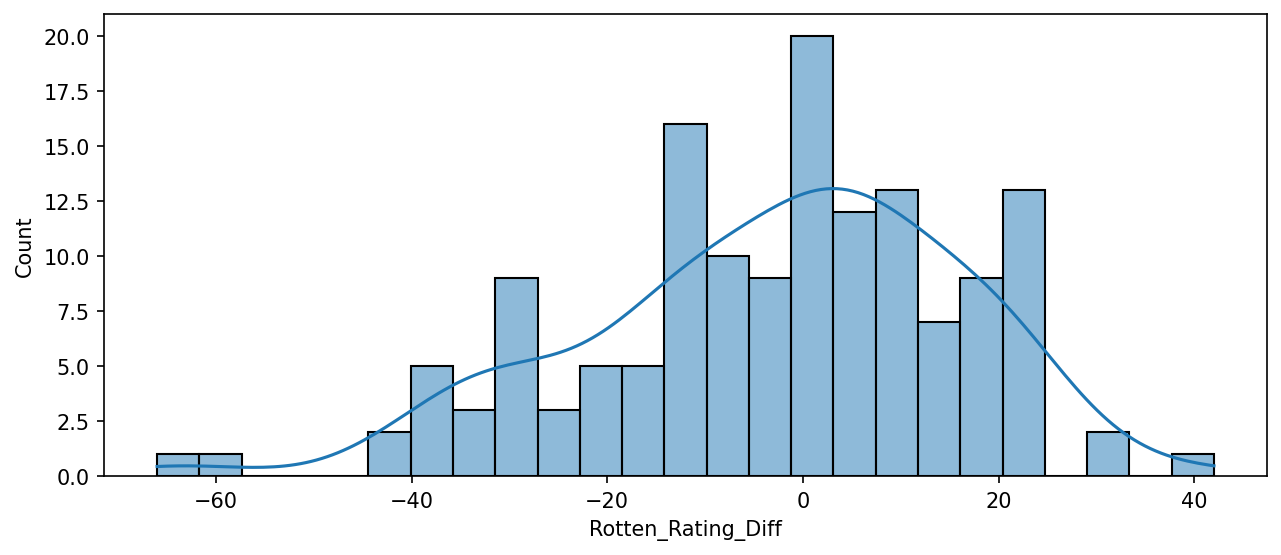

In [29]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.histplot(data = other_sites, x = 'Rotten_Rating_Diff', kde = True, bins = 25)

The graph above shows the difference in movie ratings between users and critics. For instance, a difference of -60 happened only once, meaning users liked it while critics didn't. Similarly, a +40 rating means users disliked it but critics loved it."However, most of the time, the difference is close (below +10), indicating that users and critics agreed on the majority of movies.

<AxesSubplot:xlabel='Rotten_Rating_Diff', ylabel='Count'>

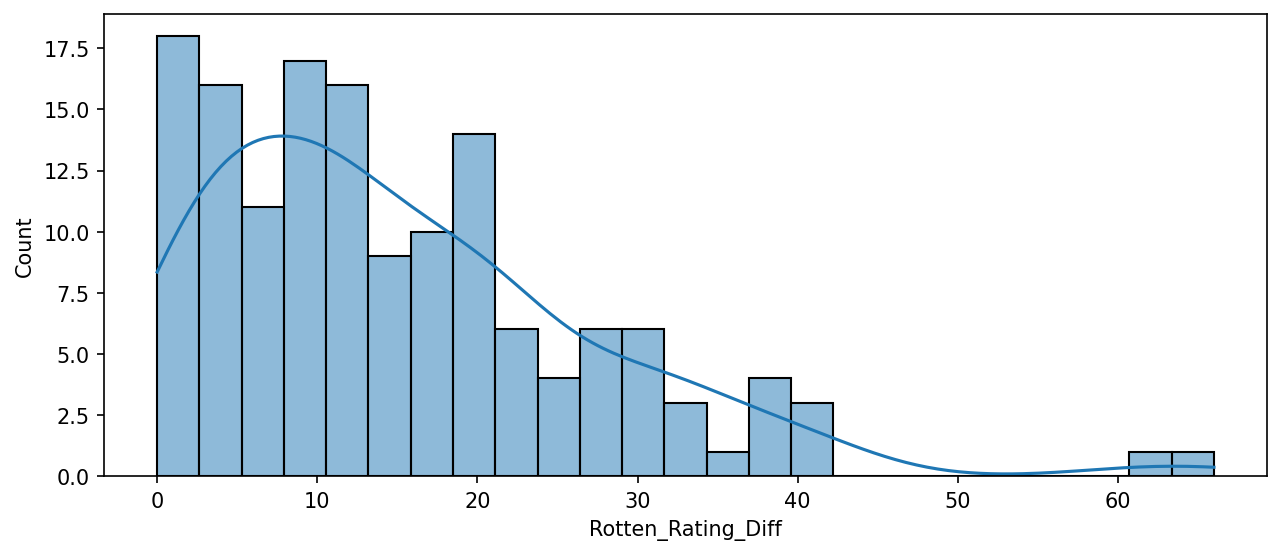

In [30]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.histplot(x = other_sites['Rotten_Rating_Diff'].apply(abs), kde = True, bins = 25)

The above graph shows the absolute value difference between users and critics (just positive numbers instead of negative).

In [31]:
other_sites.nlargest(10, 'Rotten_Rating_Diff')['FILM'] # diff = critics - users

69                                   Mr. Turner (2014)
112                                  It Follows (2015)
115                           While We're Young (2015)
37                                Welcome to Me (2015)
40                    I'll See You In My Dreams (2015)
145                 Kumiko, The Treasure Hunter (2015)
90     The SpongeBob Movie: Sponge Out of Water (2015)
7                                      Top Five (2014)
11                                    Black Sea (2015)
87                                       Maggie (2015)
Name: FILM, dtype: object

The above list shows the movies that the critics love more than the users!

In [32]:
other_sites.nsmallest(10, 'Rotten_Rating_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
132                   Max (2015)
15                Taken 3 (2015)
19                 Pixels (2015)
51              Entourage (2015)
47                  Annie (2014)
Name: FILM, dtype: object

The above list shows the movies that the users love more than the critics!

## MetaCritic 



(0.0, 100.0)

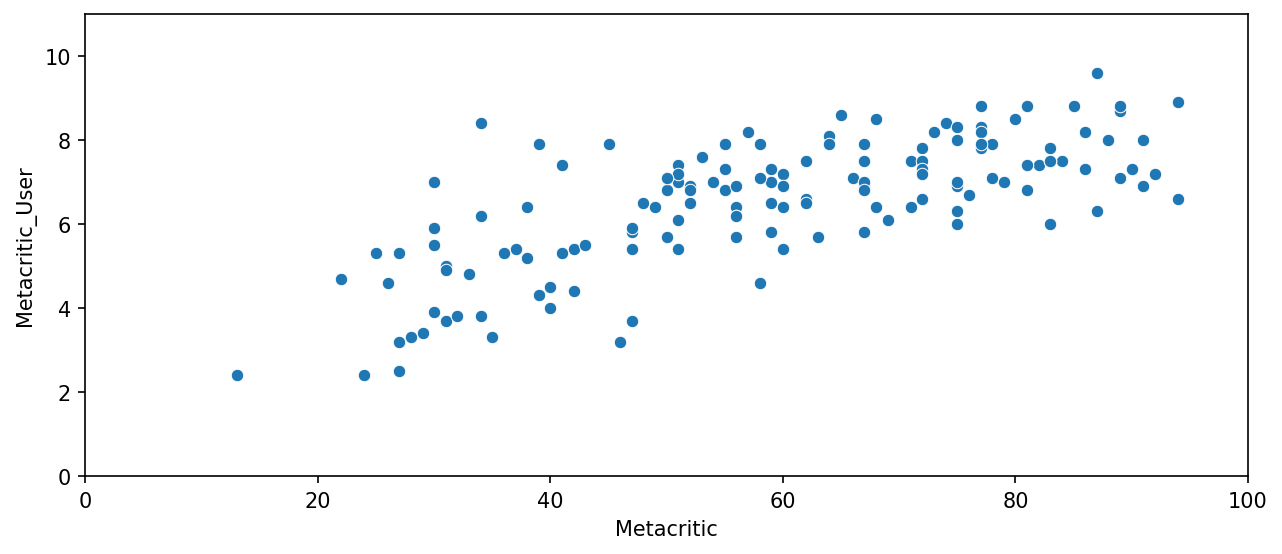

In [33]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.scatterplot(data = other_sites, x = 'Metacritic', y = 'Metacritic_User')
plt.ylim(0,11)
plt.xlim(0,100)

Here too, the rating shown on the MetaCritic site is similar to the original rating given by the users since the graph is linear. 

## IMDb 

Finally let's take a look at IMDb, the  most popular site for checking movie ratings. Both MetaCritic and IMDb shows the vote counts.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

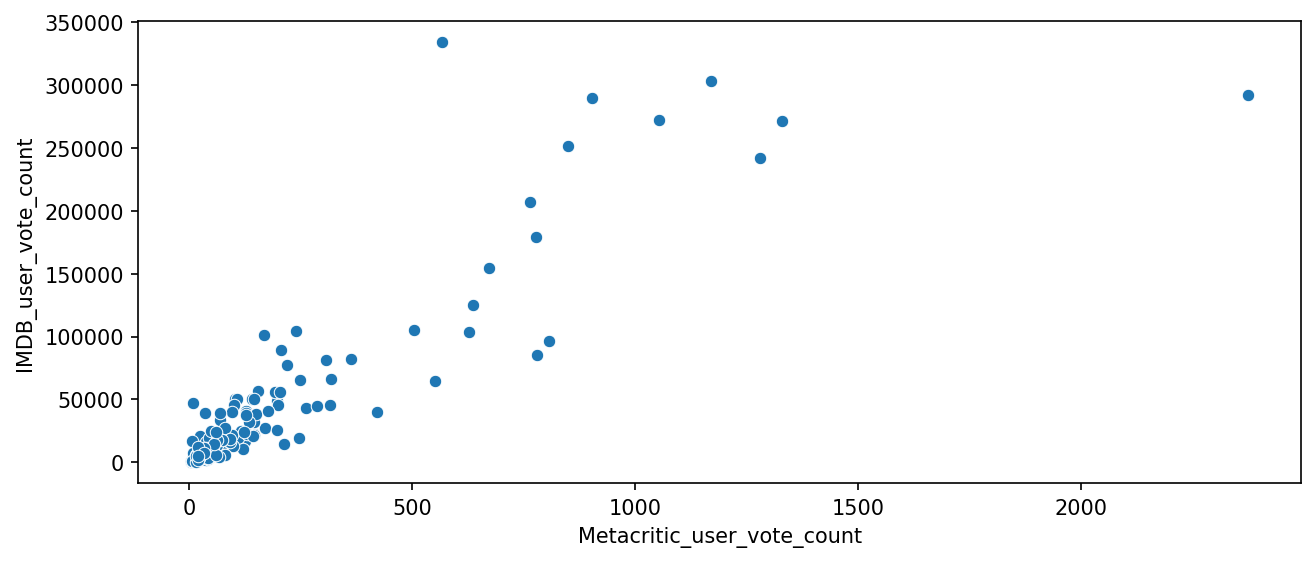

In [34]:
plt.figure(figsize = (10,4), dpi = 150)
sns.scatterplot(data = other_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

It is clear that IMDb has a lot of user votes on average compared to MetaCritic. However, on the far right side lies the movie that seems to be the most popular because it has an avg. rating of 300k on IMDb and above 2000 on MetaCritic. And on the top left there is a movie with the most IMDb vote count. Let's check this out. 

In [35]:
other_sites.nlargest(1, 'IMDB_user_vote_count')['FILM']

14    The Imitation Game (2014)
Name: FILM, dtype: object

So, The Imitation Game has the most user votes on IMDb. 

In [36]:
other_sites.nlargest(1, 'Metacritic_user_vote_count')['FILM']

88    Mad Max: Fury Road (2015)
Name: FILM, dtype: object

Similarly, Mad Max: Fury Road has the most votes on MetaCritic and it is the most popular movie across both platforms combined.

# Fandango Scores vs. All Other Sites 

Finally, let's see whether Fandango is artificially displaying higher ratings than what's actually rated to increase ticket sales (Fandango is the only site that sells tickets in addition to showing movie ratings).

In [38]:
df = pd.merge(fandango, other_sites, on = 'FILM', how = 'inner')

In [39]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Rating_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


The above dataframe has all of the movies common to all of the sites. 

In [47]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Rating_Diff                42.0
Name: max, dtype: float64

In [50]:
df['RT_norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RT_user_norm'] = np.round(df['RottenTomatoes_User']/20, 1)

df['MC_norm'] = np.round(df['Metacritic']/20, 1)
df['MC_user_norm'] = np.round(df['Metacritic_User']/2, 1)

df['IMDB_norm'] = np.round(df['IMDB']/2, 1)

This will normalise the ratings. This way it's easy to compare the ratings of these websites out of the score 5. Basically this makes it easy for us to compare these normalised ratings to the stars and ratings of Fandango. 

In [53]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Rating_Diff,RT_norm,RT_user_norm,MC_norm,MC_user_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [56]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Rotten_Rating_Diff', 'RT_norm', 'RT_user_norm', 'MC_norm',
       'MC_user_norm', 'IMDB_norm'],
      dtype='object')

In [59]:
norm_scores = df[['FILM', 'STARS', 'RATING', 'RT_norm', 'RT_user_norm', 'MC_norm',
       'MC_user_norm', 'IMDB_norm']]

By doing this we're making a new datafram that only consists of these ratings that we are about to compare.

In [60]:
norm_scores.head()

,FILM,STARS,RATING,RT_norm,RT_user_norm,MC_norm,MC_user_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


Now let's compare the distribution of scores across the sites. Let's plot something as it's clear on the glance that Fandango has a huge bias towards the ratings positively.

<AxesSubplot:ylabel='Density'>

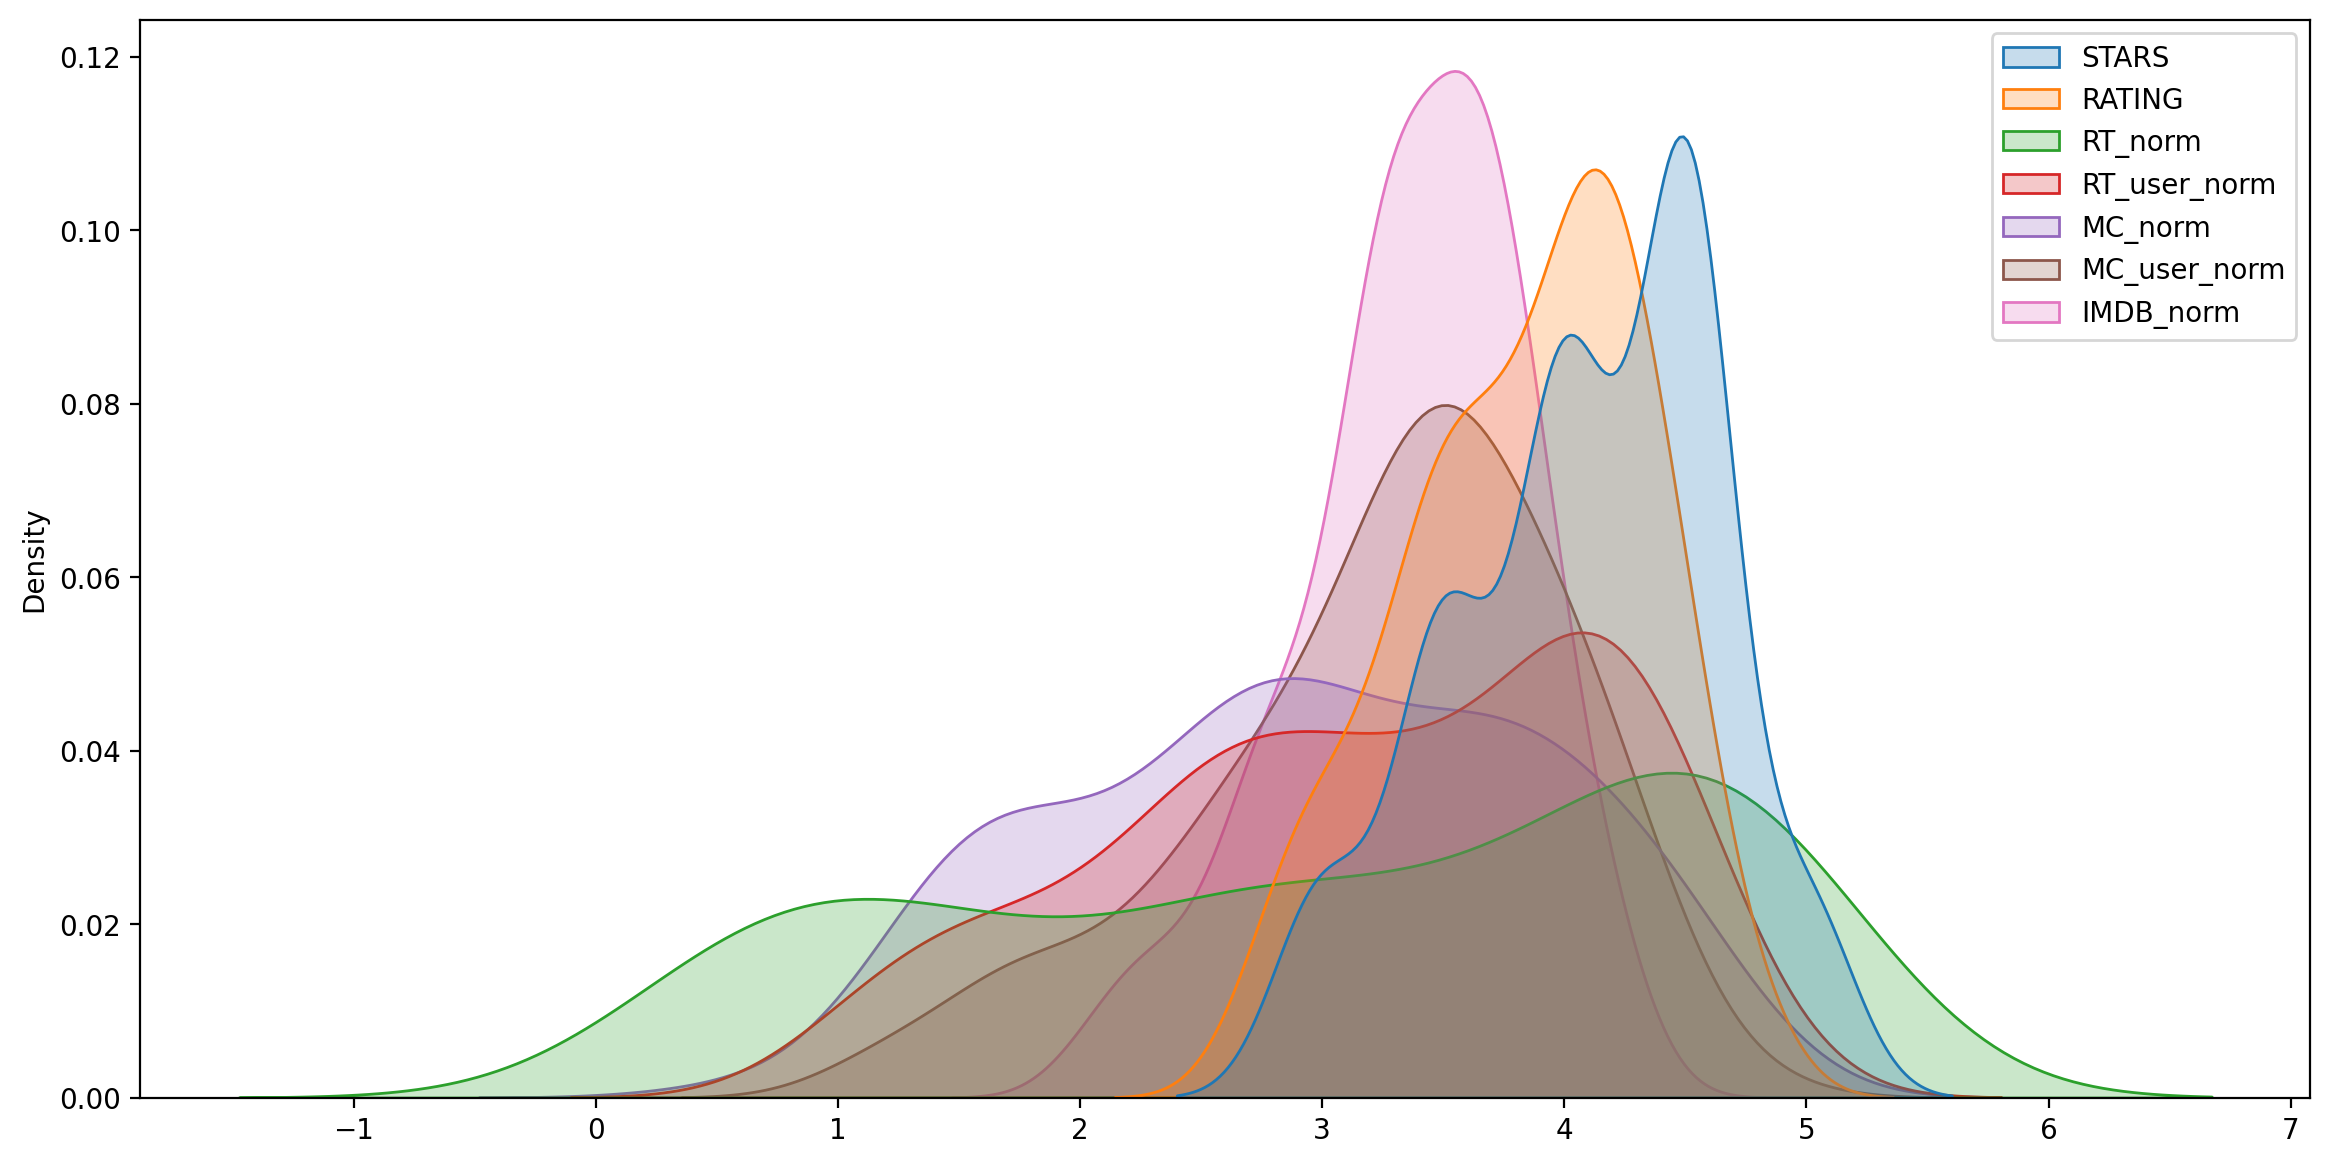

In [64]:
plt.figure(figsize = (14, 7), dpi = 200)
sns.kdeplot(data = norm_scores, fill = True, shade = True)

It's clear that Rotten Tomatoe critics (RT_norm) has the most uniform distribution. It's also clear that Fandango almost rates all of the movies at an average above 4 (both stars and ratings) whereas in the case of IMDb and MC user ratings the averate is around 3.5.

<AxesSubplot:ylabel='Density'>

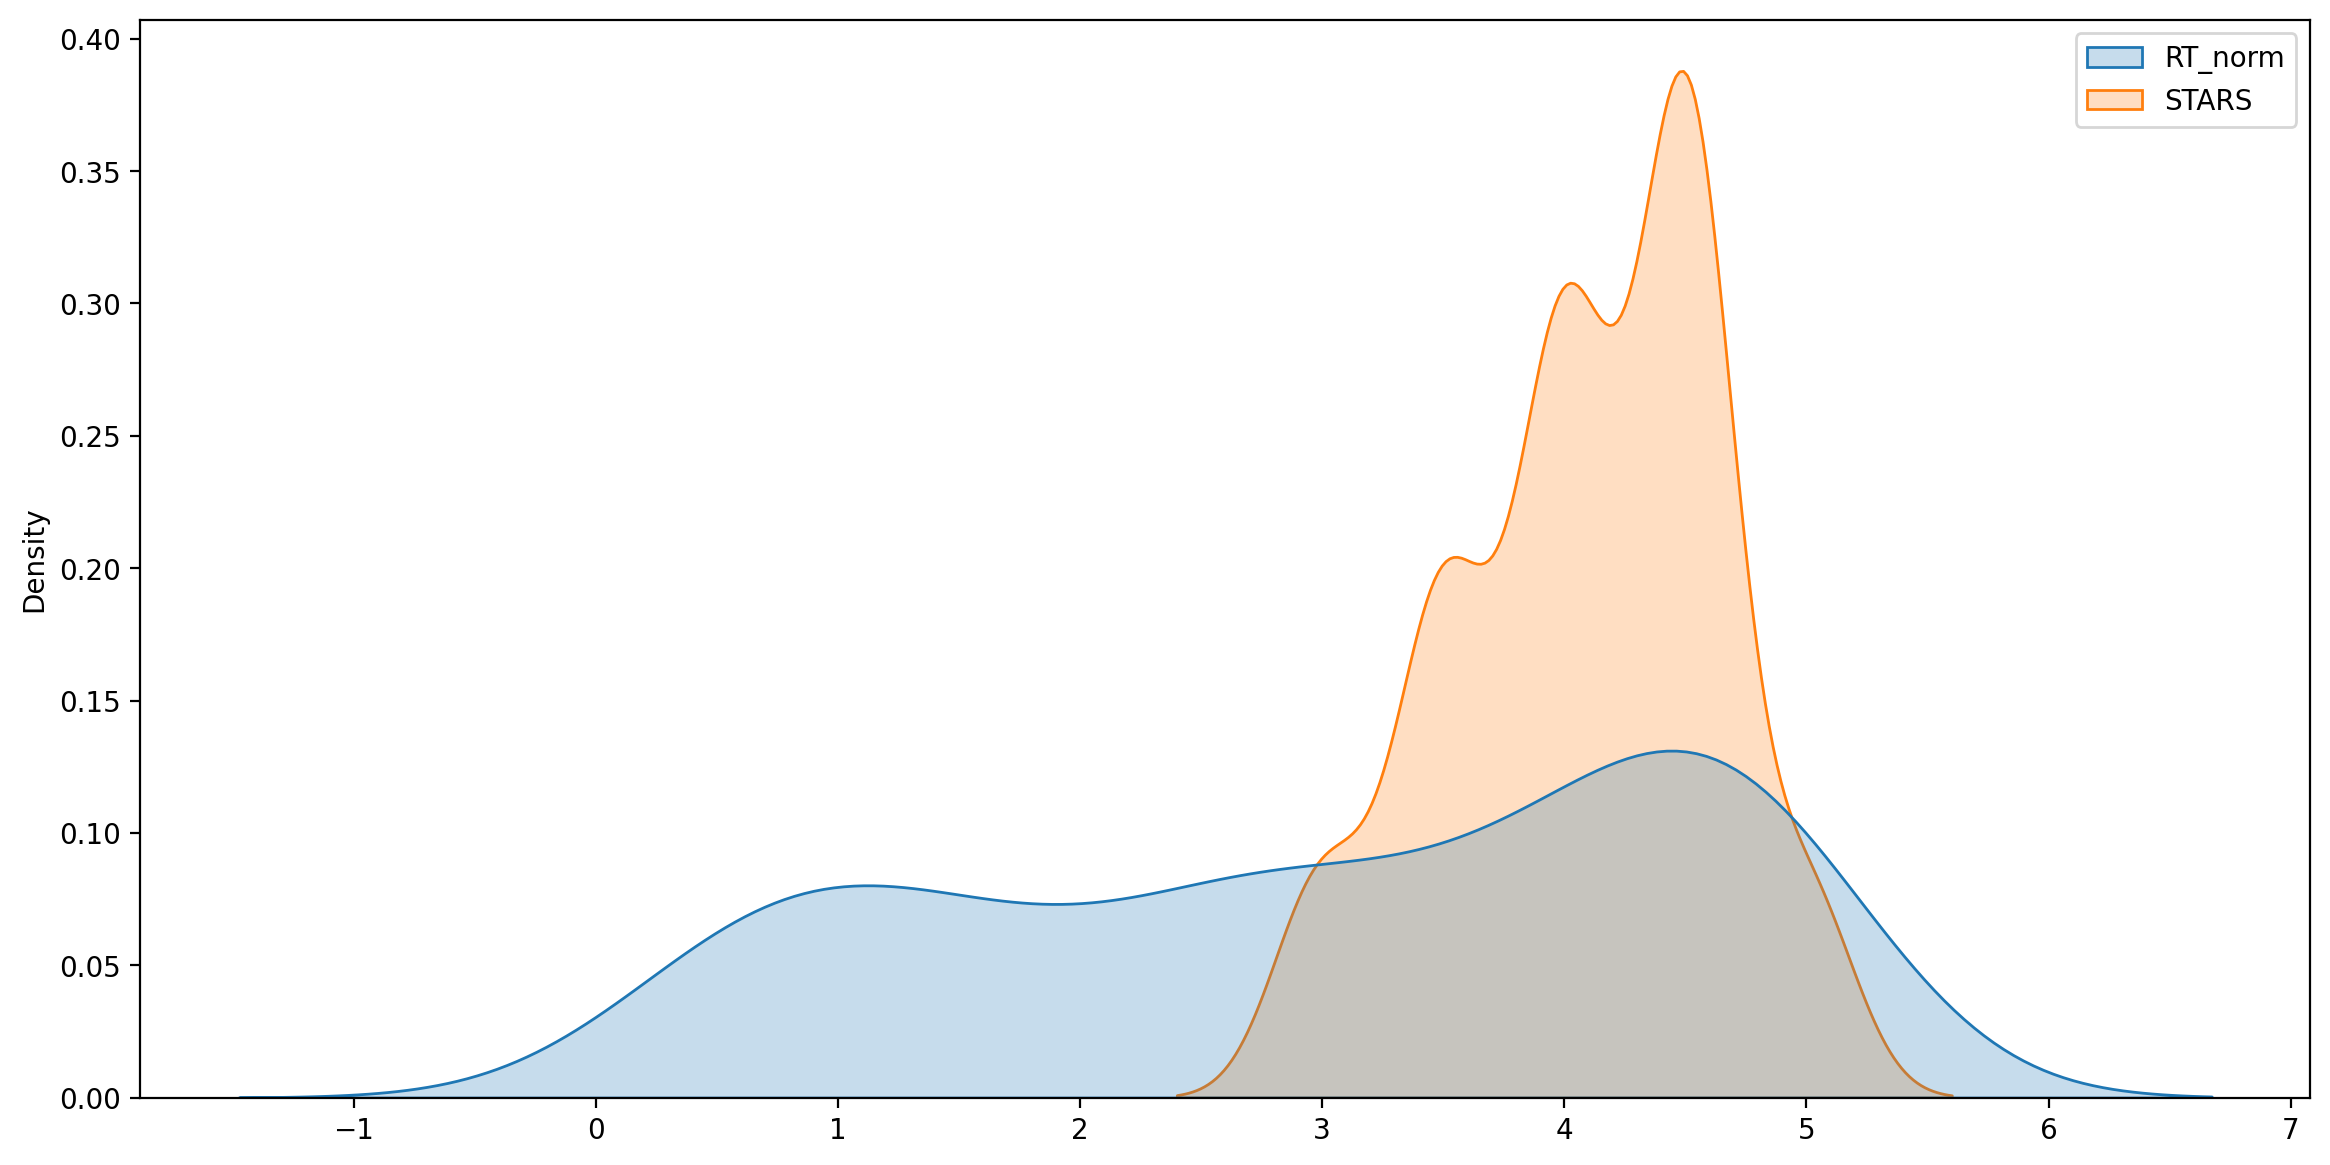

In [67]:
plt.figure(figsize = (14, 7), dpi = 200)
sns.kdeplot(data = norm_scores[['RT_norm', 'STARS']], fill = True, shade = True)

So the above plot says Fandango only has a rating above 3 and most of the movies would be rated around 4.5 which is very unrealistic.

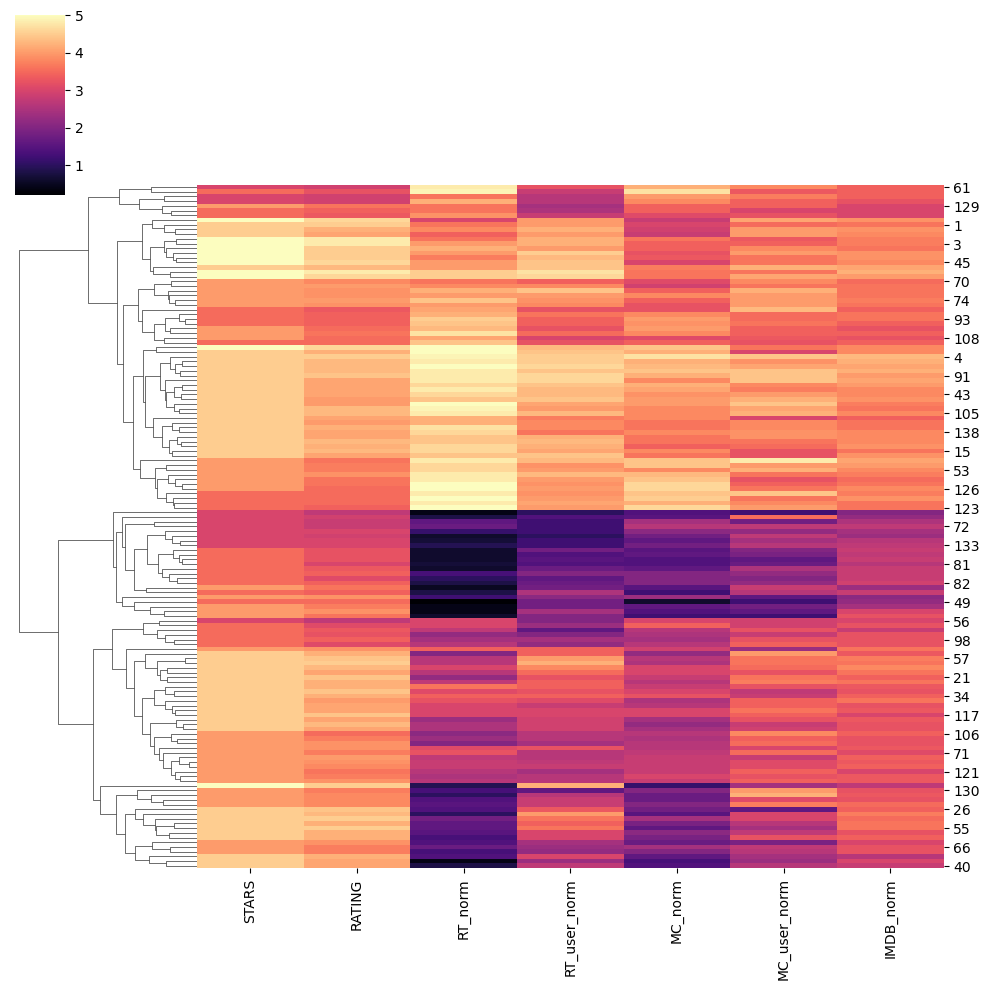

In [71]:
sns.clustermap(norm_scores[['STARS', 'RATING', 'RT_norm', 'RT_user_norm', 'MC_norm',
       'MC_user_norm', 'IMDB_norm']], cmap = 'magma', col_cluster = False)

The graph above categorizes movies as either dark (indicating low ratings) or bright orange (indicating high ratings). It is evident that all movies rated by Fandango are closely aligned with the orange color, indicating higher ratings. On the other hand, movies from other sites show similar color levels, suggesting similar ratings for most of them. 

In [75]:
worst_films = norm_scores.nsmallest(10, 'RT_norm') # we're trusting on Rotten Tomatoe critic scores

In [76]:
worst_films

,FILM,STARS,RATING,RT_norm,RT_user_norm,MC_norm,MC_user_norm,IMDB_norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


<AxesSubplot:ylabel='Density'>

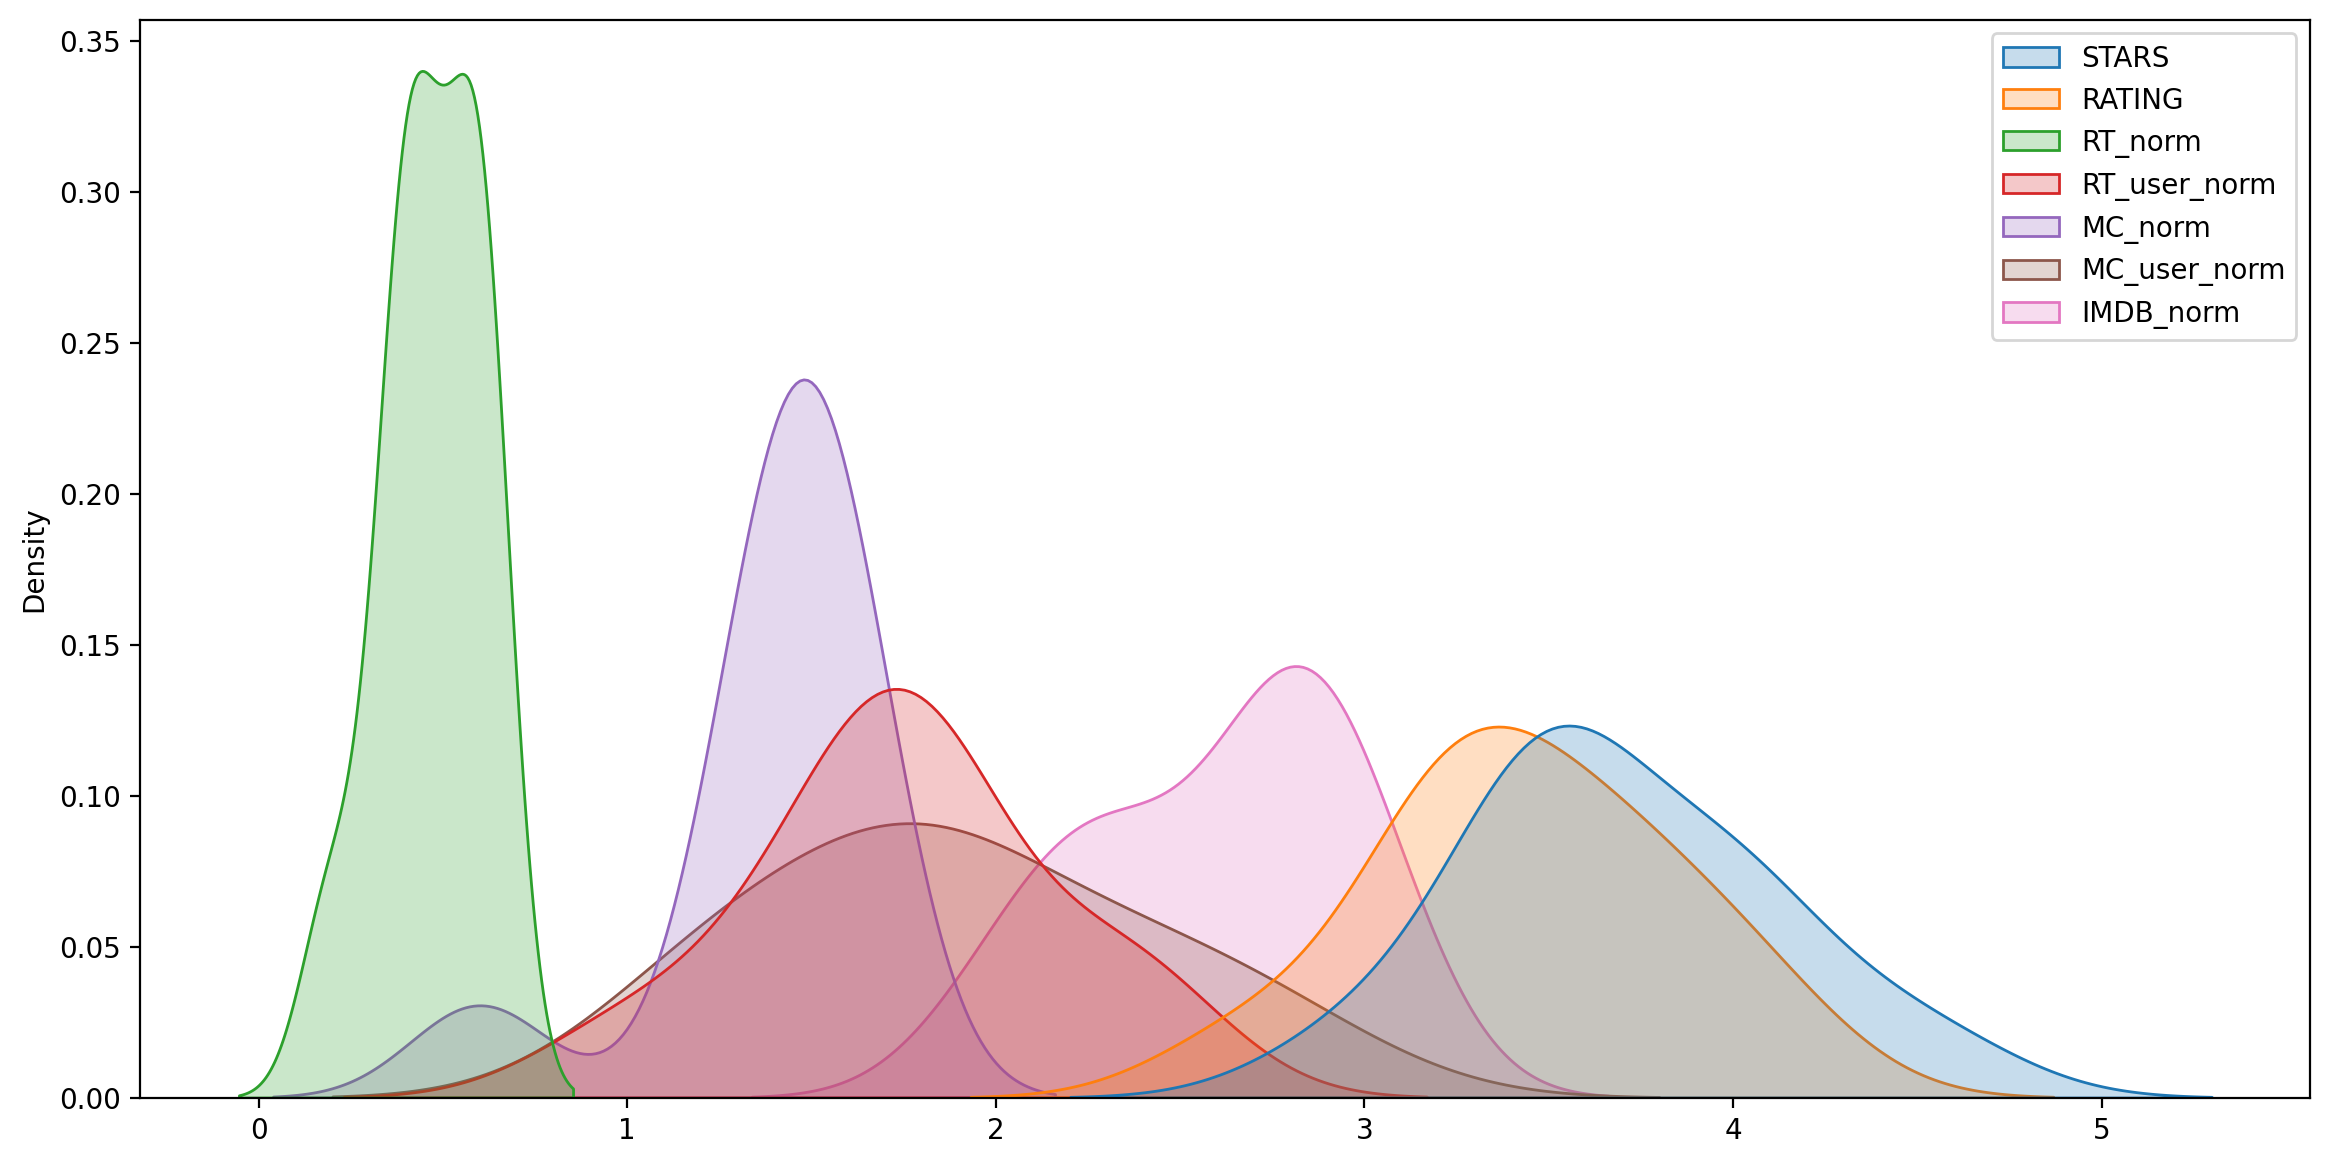

In [77]:
plt.figure(figsize = (14, 7), dpi = 200)
sns.kdeplot(data = worst_films, fill = True, shade = True)

3.5 - 4 stars is shown by Fandango even for the worst films! Taken 3 has 4.5 stars, so let's find the average rating acorss all the other sites.

In [92]:
norm_scores.transpose()[25]

FILM            Taken 3 (2015)
STARS                      4.5
RATING                     4.1
RT_norm                    0.4
RT_user_norm               2.3
MC_norm                    1.3
MC_user_norm               2.3
IMDB_norm                  3.0
Name: 25, dtype: object

After doing the math, the average rating of Taken 3 according to all the other sites comes out to be 1.86 and Fandango rated it 4.5 stars!